In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import sklearn.metrics

import time

# Kmeans Clustering

In [2]:
column_names = ["Alcohol", "Malic Acid", "Ash", "Alcalinity Of Ash", "Magnesium", "Total Phenols",
               "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color_intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]

df = pd.read_csv("wine.data", names = column_names) 
df.reset_index(inplace = True)
df = df.rename({'index': 'Correct classification'}, axis='columns')
df

,Correct classification,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#find number of null entries to see if there is a need to clean the dataset
df.isnull().sum()

Correct classification          0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity Of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [4]:
df.nunique()

Correct classification            3
Alcohol                         126
Malic Acid                      133
Ash                              79
Alcalinity Of Ash                63
Magnesium                        53
Total Phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color_intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

In [5]:
num_clusters = df['Correct classification'].nunique()
num_clusters

3

In [6]:
df2 = df.iloc[: , :1]
test_data = df2['Correct classification']
test_data

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Correct classification, Length: 178, dtype: int64

In [7]:
df = df.iloc[:, 1:]
df

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


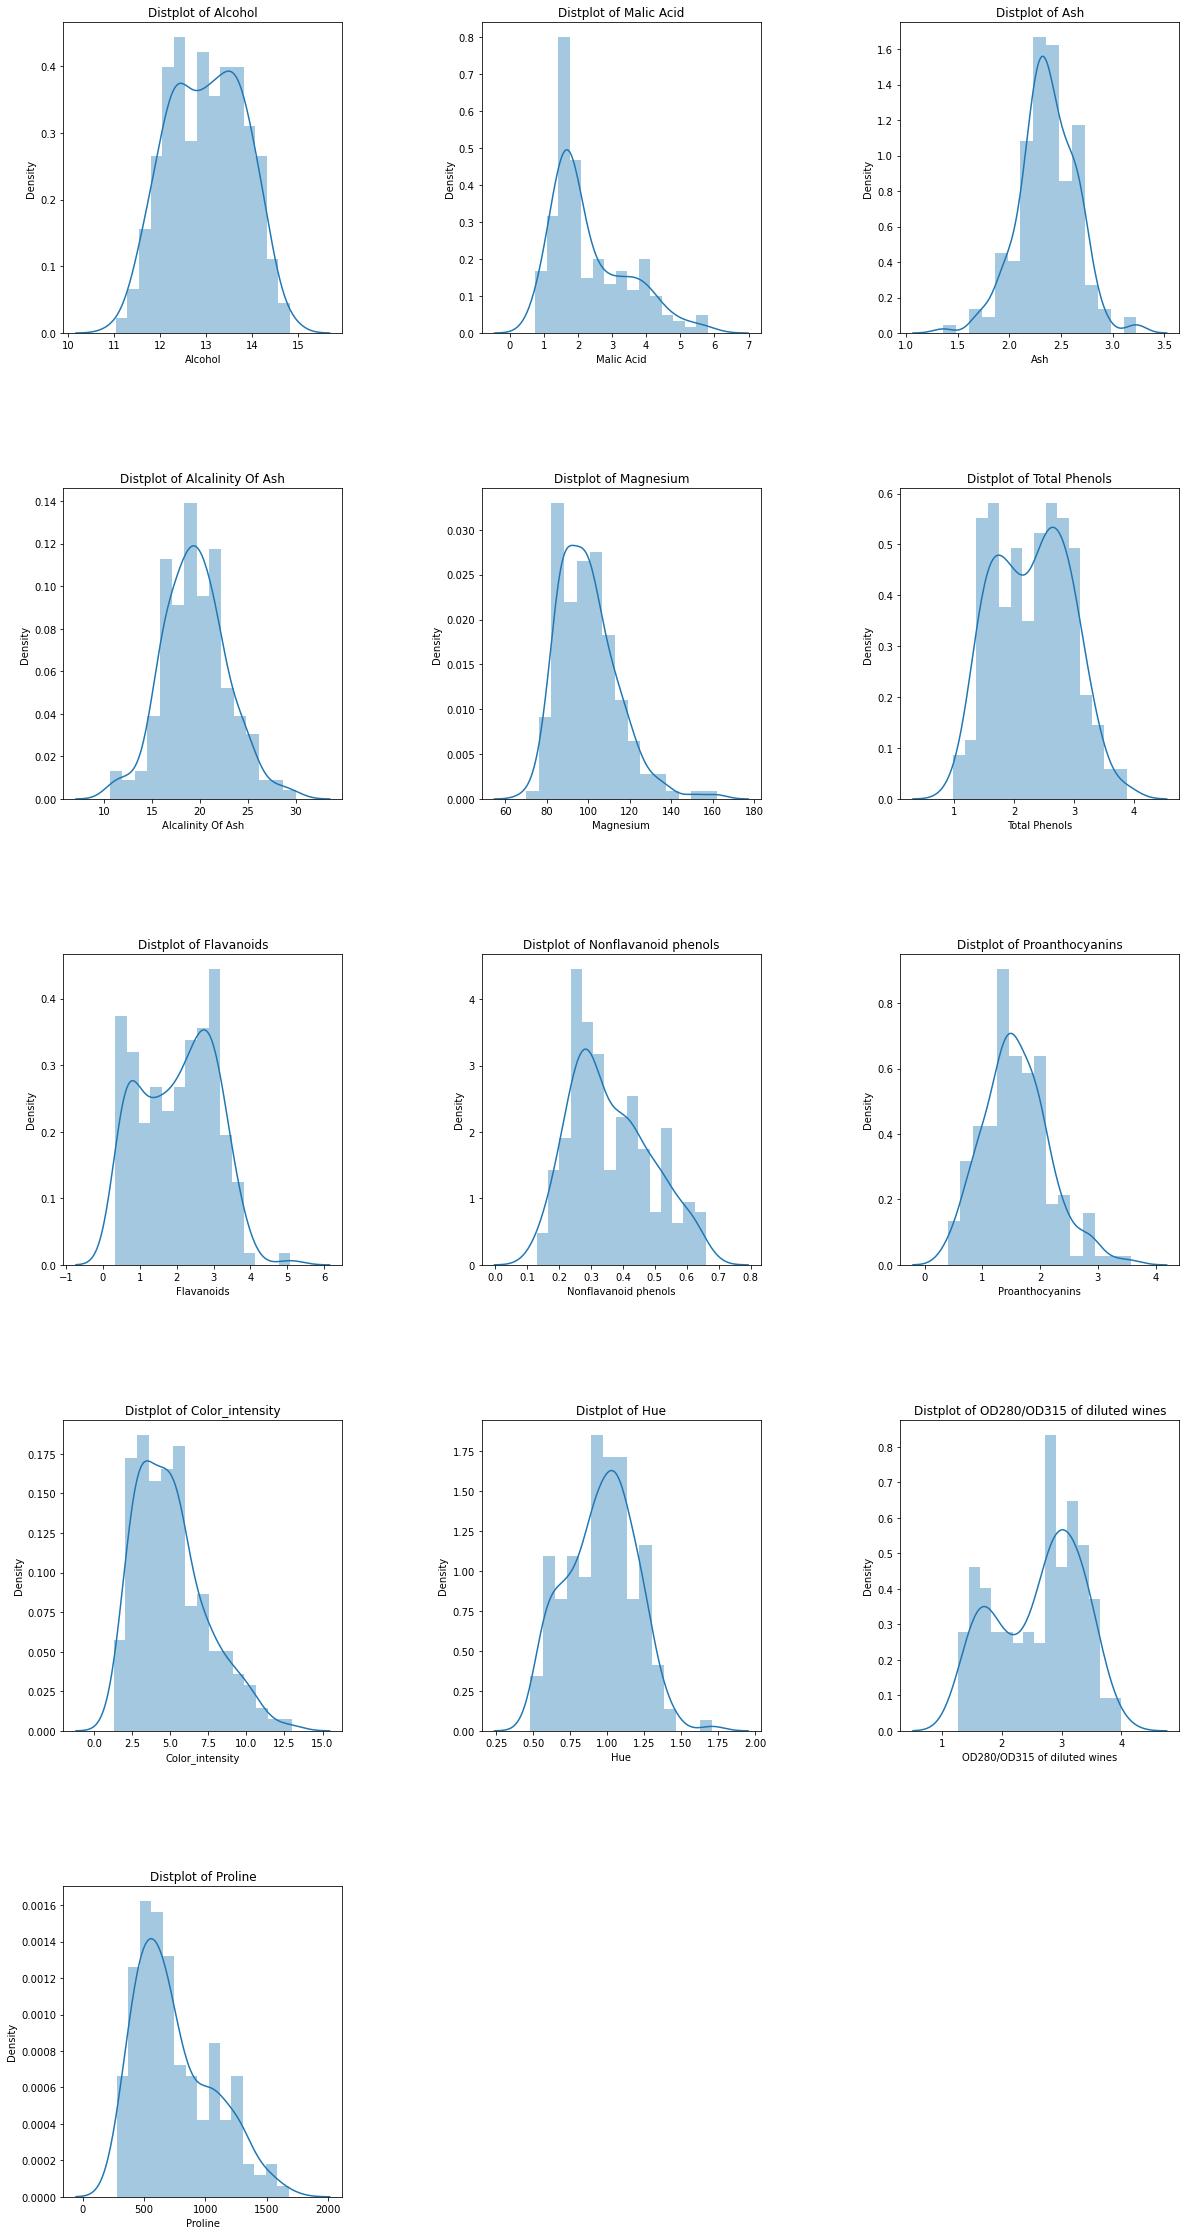

In [8]:
plt.figure(1 , figsize = (20 , 40))
n = 0 
for x in column_names:
    n += 1
    plt.subplot(5 , 3 , n)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
for_visual = scaled_features_df.copy()
scaled_features_df

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [10]:
# import PCA
from sklearn.decomposition import PCA 
# Applying PCA to visualize data
pca = PCA(n_components = 2)
pca_data_visual = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2']) 
pca_data = pca_data_visual.copy()
pca_data

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [11]:
def kmeans_clustering(train_data, num_clusters, test_data):
    cluster_data = train_data.copy()
    kmeans = KMeans(n_clusters = num_clusters, random_state=42)
    kmeans.fit(train_data)
    #implement 3 other metrics here
    print('Classification Accuracy: ', classification_accuracy(cluster_data, kmeans.labels_, test_data))
    print('Davies Bouldin index: ', davies_bouldin(train_data, kmeans.labels_))
    print('Silhouetter Score: ', silhouette(train_data, kmeans.labels_))
    print('Calinski Harabasz Score: ', calinski_score(train_data, kmeans.labels_))

In [12]:
# train_data is the data we fit the clustering algorithm on (without the predict label and after all the cleaning, PCA, one_hot_encoding)
# predicted_clusters is the output we get from the clustering algorithm(eg:- kmeans.labels_)
# test_data is the predict label which we remove from the train_data

# train_data - DataFrame
# predicted_cluster - Series
# test_data - 

def classification_accuracy(train_data, predicted_clusters, test_data):
    actual_labels = test_data.value_counts().index.tolist()
    train_data['predicted_clusters'] = predicted_clusters
    cluster_labels = pd.value_counts(pd.Series(predicted_clusters))
    cluster_labels = np.stack([cluster_labels.keys().values, cluster_labels.values]).T
    cluster_labels = cluster_labels.tolist()
    for i in range(len(cluster_labels)):
        cluster_labels[i].append(actual_labels[i])
    cluster_labels.sort()
    train_data['predicted_labels'] = list(map(lambda x : cluster_labels[x][2], train_data['predicted_clusters']))
    sum(train_data['predicted_labels']==test_data)
    accuracy = sum(train_data['predicted_labels']==test_data)/len(test_data)
    return accuracy

def davies_bouldin(train_data, predicted_clusters):
    from sklearn.metrics import davies_bouldin_score
    return(davies_bouldin_score(train_data, predicted_clusters))

def silhouette(train_data, predicted_clusters):
    from sklearn.metrics import silhouette_score
    score = silhouette_score(train_data, predicted_clusters, metric='euclidean')
    return score

def calinski_score(train_data, predicted_clusters):
    from sklearn.metrics import calinski_harabasz_score
    return(calinski_harabasz_score(train_data, predicted_clusters))
#Example
#classification_accuracy(clustering_data, kmeans.labels_, test_data)

## Using the scaled data for kmeans

In [13]:
kmeans =KMeans(n_clusters=num_clusters,random_state=42).fit(for_visual)

In [14]:
kmeans_clustering(for_visual, num_clusters, test_data)

Classification Accuracy:  0.9662921348314607
Davies Bouldin index:  1.3891879777181648
Silhouetter Score:  0.2848589191898987
Calinski Harabasz Score:  70.94000800315118


In [15]:
labels = kmeans.fit_predict(scaled_features_df)
scaled_features_df['cluster'] = pd.DataFrame(labels)
scaled_features_df['cluster'].value_counts()

2    65
1    62
0    51
Name: cluster, dtype: int64

In [16]:
test_data.value_counts()

2    71
1    59
3    48
Name: Correct classification, dtype: int64

## Using the pca data for kmeans and visualization 

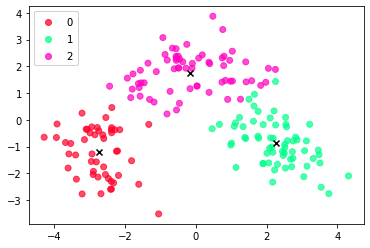

In [17]:
fig,ax = plt.subplots()
kmeans =KMeans(n_clusters=num_clusters,random_state=42).fit(pca_data)
pca_data_visual['cluster'] = pd.Categorical(kmeans.labels_)
scatter = ax.scatter(pca_data_visual['PC1'], pca_data_visual['PC2'],c=pca_data_visual['cluster'],cmap='gist_rainbow',alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')
ax.add_artist(legend1)

In [18]:
kmeans_clustering(pca_data, num_clusters, test_data)

Classification Accuracy:  0.9662921348314607
Davies Bouldin index:  0.5972661544221364
Silhouetter Score:  0.5610505693103246
Calinski Harabasz Score:  344.79259483209967


In [19]:
labels = kmeans.fit_predict(pca_data)
pca_data['cluster'] = pd.DataFrame(labels)
pca_data['cluster'].value_counts()

2    65
1    64
0    49
Name: cluster, dtype: int64

In [20]:
test_data.value_counts()

2    71
1    59
3    48
Name: Correct classification, dtype: int64

# Kmeans++ Clustering

In [21]:
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [22]:
scaled_features_df = scaled_features_df.join(df2)
for_visual = scaled_features_df.copy()
scaled_features_df

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline,Correct classification
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


In [23]:
pca = PCA(n_components = 2)
pca_data_visual = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2']) 
pca_data = pca_data_visual.copy()
pca_data

,PC1,PC2
0,3.441657,-1.449756
1,2.404678,0.331191
2,2.679474,-1.034930
3,3.856861,-2.764106
4,1.251577,-0.868489
...,...,...
173,-3.526617,-2.209979
174,-2.809802,-1.753991
175,-2.891731,-2.757732
176,-2.612102,-2.295025


In [24]:
def plus_plus(ds, k, random_state=42):
    np.random.seed(42)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)

In [25]:
ds_scaled = for_visual.to_numpy()

In [26]:
ds_pca = pca_data.to_numpy()

In [27]:
ds_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893,  1.        ],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152,  1.        ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818,  1.        ],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  3.        ],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  3.        ],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  3.        ]])

In [28]:
ds_pca

array([[ 3.44165724, -1.44975594],
       [ 2.40467835,  0.33119117],
       [ 2.67947383, -1.03492964],
       [ 3.85686127, -2.76410563],
       [ 1.25157701, -0.86848904],
       [ 3.19495159, -2.12748026],
       [ 2.6333408 , -1.17767244],
       [ 2.26316345, -1.61048014],
       [ 2.68417764, -0.92140769],
       [ 2.90657446, -0.79390876],
       [ 3.60054096, -1.30898819],
       [ 1.97152882, -0.61263425],
       [ 2.31195613, -0.67754656],
       [ 3.58966056, -1.13682834],
       [ 4.39059555, -2.10534355],
       [ 2.4903898 , -1.66507887],
       [ 2.35642265, -2.32965429],
       [ 2.09810283, -1.63282205],
       [ 3.66383346, -2.52491698],
       [ 2.27292462, -1.06335402],
       [ 3.25258932, -0.79284962],
       [ 1.32707088, -0.24066148],
       [ 2.71420461,  0.08858775],
       [ 1.86656545,  0.51584753],
       [ 1.97723066,  0.3163477 ],
       [ 1.23848064, -0.93906825],
       [ 1.99428622, -0.68678147],
       [ 1.47616184,  0.09070625],
       [ 2.38337738,

In [29]:
centroids_scaled = plus_plus(ds_scaled, num_clusters)

In [30]:
centroids_pca = plus_plus(ds_pca, num_clusters)

In [31]:
def kmeans_clustering_plus(train_data, num_centroids, num_clusters, test_data):
    cluster_data = train_data.copy()
    kmeans = KMeans(n_clusters = num_clusters, init = num_centroids, random_state=42)
    kmeans.fit(train_data)
    #implement 3 other metrics here
    print('Classification Accuracy: ', classification_accuracy(cluster_data, kmeans.labels_, test_data))
    print('Davies Bouldin index: ', davies_bouldin(train_data, kmeans.labels_))
    print('Silhouetter Score: ', silhouette(train_data, kmeans.labels_))
    print('Calinski Harabasz Score: ', calinski_score(train_data, kmeans.labels_))

## Using the scaled data for kmeans++

In [32]:
kmeans =KMeans(n_clusters=num_clusters, init = centroids_scaled ,random_state=42).fit(for_visual)

In [33]:
kmeans_clustering_plus(for_visual, centroids_scaled, num_clusters, test_data)

Classification Accuracy:  0.9775280898876404
Davies Bouldin index:  1.3423004093646338
Silhouetter Score:  0.2979634138912829
Calinski Harabasz Score:  77.5540793927573


In [34]:
labels = kmeans.fit_predict(scaled_features_df)
scaled_features_df['cluster'] = pd.DataFrame(labels)
scaled_features_df['cluster'].value_counts()

1    67
0    62
2    49
Name: cluster, dtype: int64

In [35]:
test_data.value_counts()

2    71
1    59
3    48
Name: Correct classification, dtype: int64

## Using the pca data for kmeans++ and visualization 

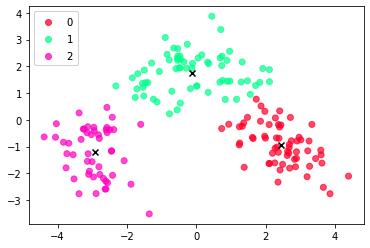

In [36]:
fig,ax = plt.subplots()
kmeans =KMeans(n_clusters=num_clusters, init = centroids_pca ,random_state=42).fit(pca_data)
pca_data_visual['cluster'] = pd.Categorical(kmeans.labels_)
scatter = ax.scatter(pca_data_visual['PC1'], pca_data_visual['PC2'],c=pca_data_visual['cluster'],cmap='gist_rainbow',alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')
ax.add_artist(legend1)

In [37]:
kmeans_clustering_plus(pca_data, centroids_pca, num_clusters, test_data)

Classification Accuracy:  0.9775280898876404
Davies Bouldin index:  0.5612810688152877
Silhouetter Score:  0.5869065823231487
Calinski Harabasz Score:  401.5801186522949


In [38]:
labels = kmeans.fit_predict(pca_data)
pca_data['cluster'] = pd.DataFrame(labels)
pca_data['cluster'].value_counts()

1    67
0    62
2    49
Name: cluster, dtype: int64

In [39]:
test_data.value_counts()

2    71
1    59
3    48
Name: Correct classification, dtype: int64